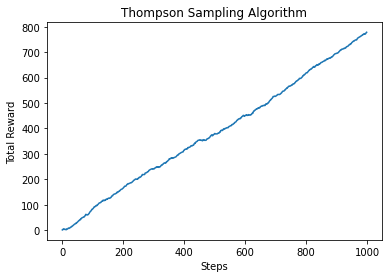

Estimated value of Arm 1: 0.5384615384615384
Estimated value of Arm 2: 0.7419354838709677
Estimated value of Arm 3: 0.7314814814814815
Estimated value of Arm 4: 0.6097560975609756
Estimated value of Arm 5: 0.8180661577608143


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the true action values for each arm (ground truth)
true_action_values = [0.3, 0.5, 0.7, 0.2, 0.8]

# Number of arms (slot machines)
num_arms = len(true_action_values)

# Number of time steps
num_steps = 1000

# Initialize variables for Thompson Sampling
alpha = np.ones(num_arms)  # Prior for the success (reward) rate
beta = np.ones(num_arms)   # Prior for the failure rate
total_reward = 0
reward_history = []

# Run the Thompson Sampling algorithm
for step in range(num_steps):
    # Sample from the posterior distribution for each arm
    sampled_means = np.random.beta(alpha, beta)
    
    # Choose the arm with the highest sampled mean
    action = np.argmax(sampled_means)
    
    # Simulate the reward from the chosen arm (normally distributed with mean true_action_values[action])
    reward = np.random.normal(true_action_values[action], 1.0)
    
    # Update alpha and beta for the chosen arm based on the observed reward
    if reward > 0:
        alpha[action] += 1
    else:
        beta[action] += 1
    
    # Update total reward
    total_reward += reward
    
    # Record reward for this step
    reward_history.append(total_reward)

# Plot the results
plt.plot(reward_history)
plt.xlabel("Steps")
plt.ylabel("Total Reward")
plt.title("Thompson Sampling Algorithm")
plt.show()

# Print the estimated action values
for arm in range(num_arms):
    estimated_mean = alpha[arm] / (alpha[arm] + beta[arm])
    print(f"Estimated value of Arm {arm+1}: {estimated_mean}")
